In [1]:
import pandas as pd
import json
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.tree import DecisionTreeClassifier
#import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
# Âä†ËΩΩ JSON Êï∞ÊçÆ
tweets_data = []
with open('tweets_DM.json', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        # ÊèêÂèñÂµåÂ•óÂ≠óÊÆµ _source.tweet
        tweet_data = tweet.get('_source', {}).get('tweet', {})
        tweets_data.append(tweet_data)

# ËΩ¨Êç¢‰∏∫ DataFrame
tweets_df = pd.DataFrame(tweets_data)

# Êü•ÁúãÁªìÊûú
print(tweets_df.head())


                        hashtags  tweet_id  \
0                     [Snapchat]  0x376b20   
1  [freepress, TrumpLegacy, CNN]  0x2d5350   
2                   [bibleverse]  0x28b412   
3                             []  0x1cd5b0   
4                             []  0x2de201   

                                                text  
0  People who post "add me on #Snapchat" must be ...  
1  @brianklaas As we see, Trump is dangerous to #...  
2  Confident of your obedience, I write to you, k...  
3                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>  
4  "Trust is not the same as faith. A friend is s...  


In [3]:
# Âä†ËΩΩ CSV Êñá‰ª∂
emotion = pd.read_csv('emotion.csv')
data_identification = pd.read_csv('data_identification.csv')

# ÂêàÂπ∂Êï∞ÊçÆÔºöÊé®ÊñáÂÜÖÂÆπ‰∏éÊÉÖÁª™Ê†áÁ≠æ
tweets_with_emotion = pd.merge(tweets_df, emotion, on='tweet_id', how='left')

# ÂêàÂπ∂Êï∞ÊçÆÔºöËÆ≠ÁªÉ/ÊµãËØïÈõÜÊ†áËØÜ
complete_data = pd.merge(tweets_with_emotion, data_identification, on='tweet_id', how='left')

# Êü•ÁúãÁªìÊûú
print(complete_data.head())


                        hashtags  tweet_id  \
0                     [Snapchat]  0x376b20   
1  [freepress, TrumpLegacy, CNN]  0x2d5350   
2                   [bibleverse]  0x28b412   
3                             []  0x1cd5b0   
4                             []  0x2de201   

                                                text       emotion  \
0  People who post "add me on #Snapchat" must be ...  anticipation   
1  @brianklaas As we see, Trump is dangerous to #...       sadness   
2  Confident of your obedience, I write to you, k...           NaN   
3                Now ISSA is stalking Tasha üòÇüòÇüòÇ <LH>          fear   
4  "Trust is not the same as faith. A friend is s...           NaN   

  identification  
0          train  
1          train  
2           test  
3          train  
4           test  


In [4]:


# Ê∏ÖÁêÜÊé®ÊñáÊñáÊú¨
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # ÂéªÈô§URL
    text = re.sub(r"[^\w\s#@]", "", text)  # ‰øùÁïôÊñáÂ≠ó„ÄÅ# Âíå @
    return text.strip()

complete_data['text'] = complete_data['text'].apply(clean_text)
complete_data=complete_data.drop(['hashtags'],axis=1)

In [5]:
complete_data

tweet_id                                               text  \
0        0x376b20  People who post add me on #Snapchat must be de...   
1        0x2d5350  @brianklaas As we see Trump is dangerous to #f...   
2        0x28b412  Confident of your obedience I write to you kno...   
3        0x1cd5b0                     Now ISSA is stalking Tasha  LH   
4        0x2de201  Trust is not the same as faith A friend is som...   
...           ...                                                ...   
1867530  0x316b80  When you buy the last 2 tickets remaining for ...   
1867531  0x29d0cb  I swear all this hard work gone pay off one da...   
1867532  0x2a6a4f  @Parcel2Go no card left when I wasnt in so I h...   
1867533  0x24faed  Ah corporate life where you can date LH using ...   
1867534  0x34be8c               Blessed to be living #Sundayvibes LH   

              emotion identification  
0        anticipation          train  
1             sadness          train  
2                 NaN           test  
3                fear          train  
4                 NaN           test  
...               ...            ...  
1867530           NaN           test  
1867531           NaN           test  
1867532           NaN           test  
1867533           joy          train  
1867534           joy          train  

[1867535 rows x 4 columns]

In [6]:
train_df = complete_data[complete_data['identification'] == 'train']
test_df = complete_data[complete_data['identification'] == 'test']
print(train_df)
print(test_df)

         tweet_id                                               text  \
0        0x376b20  People who post add me on #Snapchat must be de...   
1        0x2d5350  @brianklaas As we see Trump is dangerous to #f...   
3        0x1cd5b0                     Now ISSA is stalking Tasha  LH   
5        0x1d755c  @RISKshow @TheKevinAllison Thx for the BEST TI...   
6        0x2c91a8          Still waiting on those supplies Liscus LH   
...           ...                                                ...   
1867526  0x321566  Im SO HAPPY #NoWonder the name of this show #H...   
1867527  0x38959e  In every circumtance Id like to be thankful to...   
1867528  0x2cbca6  theres currently two girls walking around the ...   
1867533  0x24faed  Ah corporate life where you can date LH using ...   
1867534  0x34be8c               Blessed to be living #Sundayvibes LH   

              emotion identification  
0        anticipation          train  
1             sadness          train  
3                f

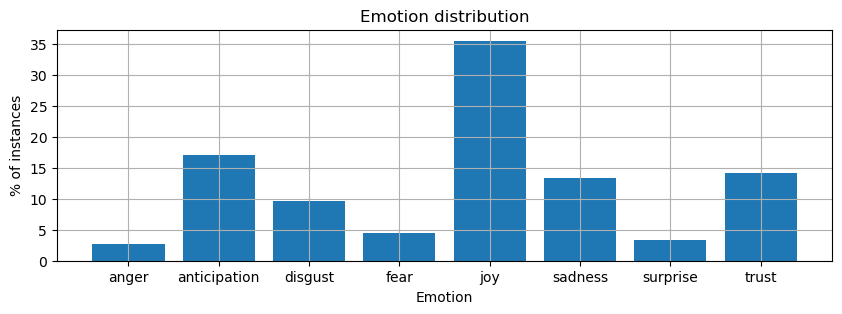

In [7]:
# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))
#plot
fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df1.index,df1.values)
#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from tensorflow import keras
import numpy as np

# Âª∫Á´ã TF-IDF Vectorizer
TFIDF = TfidfVectorizer(max_features=2500, tokenizer=nltk.word_tokenize)

# Â•óÁî® TF-IDF ÂàÜÊûêÂô®Âà∞Ë®ìÁ∑¥Ë≥áÊñô
TFIDF.fit(train_df['text'])
X_train = TFIDF.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TFIDF.transform(test_df['text'])
y_test = test_df['emotion']

# Êü•ÁúãË≥áÊñôÁ∂≠Â∫¶
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

# ËôïÁêÜÊ®ôÁ±§ (string -> one-hot)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('Ê™¢Êü•Ê®ôÁ±§: ', label_encoder.classes_)
print('\n## ËΩâÊèõÂâç')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)

# ÂÆöÁæ©Ê®ôÁ±§Á∑®Á¢ºËàáËß£Á¢ºÂáΩÊï∏
def label_encode(le, labels):
    enc = le.transform(labels)  # Â≠ó‰∏≤ËΩâÁÇ∫Êï¥Êï∏Á∑®Á¢º
    return keras.utils.to_categorical(enc)  # Êï¥Êï∏ËΩâÁÇ∫ one-hot Á∑®Á¢º

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)  # one-hot ËΩâÁÇ∫Êï¥Êï∏Á∑®Á¢º
    return le.inverse_transform(dec)  # Êï¥Êï∏Á∑®Á¢ºËΩâÂõûÂéüÂßãÂ≠ó‰∏≤Ê®ôÁ±§

# Â∞á y_train ÈÄ≤Ë°å one-hot Á∑®Á¢º
y_train = label_encode(label_encoder, y_train)

print('\n\n## ËΩâÊèõÂæå')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (1455563, 2500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 2500)
y_test.shape:  (411972,)
Ê™¢Êü•Ê®ôÁ±§:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## ËΩâÊèõÂâç
y_train[0:4]:
 0    anticipation
1         sadness
3            fear
5             joy
Name: emotion, dtype: object

y_train.shape:  (1455563,)


## ËΩâÊèõÂæå
y_train[0:4]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1455563, 8)


In [9]:
from sklearn.model_selection import train_test_split

# ÂÅáËÆæ X ÊòØÁâπÂæÅÁü©ÈòµÔºåy ÊòØÁõÆÊ†áÂèòÈáè
# Êï∞ÊçÆÈõÜÂàáÂàÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÔºåÈ™åËØÅÈõÜÊØî‰æã‰∏∫ 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size=0.2, random_state=42)

# Êü•ÁúãÊï∞ÊçÆÈõÜÂ§ßÂ∞è
print("ËÆ≠ÁªÉÈõÜÁâπÂæÅÂ§ßÂ∞è:", X_train.shape)
print("È™åËØÅÈõÜÁâπÂæÅÂ§ßÂ∞è:", X_val.shape)
print("ËÆ≠ÁªÉÈõÜÁõÆÊ†áÂ§ßÂ∞è:", y_train.shape)
print("È™åËØÅÈõÜÁõÆÊ†áÂ§ßÂ∞è:", y_val.shape)

ËÆ≠ÁªÉÈõÜÁâπÂæÅÂ§ßÂ∞è: (1164450, 2500)
È™åËØÅÈõÜÁâπÂæÅÂ§ßÂ∞è: (291113, 2500)
ËÆ≠ÁªÉÈõÜÁõÆÊ†áÂ§ßÂ∞è: (1164450, 8)
È™åËØÅÈõÜÁõÆÊ†áÂ§ßÂ∞è: (291113, 8)


In [10]:
# ÂÅáËÆæ X_train ÊòØÁâπÂæÅÁü©ÈòµÔºåy_train ÊòØ one-hot ÁºñÁ†ÅÁöÑÊ†áÁ≠æ
input_dim = X_train.shape[1]  # ËæìÂÖ•ÁâπÂæÅÊï∞Èáè
output_dim = y_train.shape[1]  # ËæìÂá∫Á±ªÂà´Êï∞Èáè

model = Sequential([
    Dense(512, input_dim=input_dim, activation='leaky_relu'),  # Á¨¨‰∏ÄÈöêËóèÂ±Ç
    Dropout(0.4),                                       # Èò≤Ê≠¢ËøáÊãüÂêà
    Dense(256, activation='leaky_relu'),                       # Á¨¨‰∫åÈöêËóèÂ±Ç
    Dropout(0.4),
    Dense(128, input_dim=input_dim, activation='leaky_relu'),
    Dropout(0.4),
    Dense(64, input_dim=input_dim, activation='leaky_relu'),
    Dropout(0.4),
    Dense(output_dim, activation='softmax')             # ËæìÂá∫Â±Ç
])

# ÁºñËØëÊ®°Âûã
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# ËÆ≠ÁªÉÊ®°Âûã
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Â¶ÇÊûúÊúâÈ™åËØÅÈõÜ
    epochs=20,                      # ËÆ≠ÁªÉËΩÆÊï∞
    batch_size=32,                  # ÊØèÊâπÊ†∑Êú¨Êï∞Èáè
    verbose=1                       # ÊòæÁ§∫ËÆ≠ÁªÉËøáÁ®ã
)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
36390/36390 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 101s 3ms/step - accuracy: 0.3763 - loss: 1.7248 - val_accuracy: 0.4534 - val_loss: 1.4843
Epoch 2/20
36390/36390 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 101s 3ms/step - accuracy: 0.4569 - loss: 1.4933 - val_accuracy: 0.4806 - val_loss: 1.4319
Epoch 3/20
36390/36390 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 3ms/step - accuracy: 0.4881 - loss: 1.4253 - val_accuracy: 0.5060 - val_loss: 1.3784
Epoch 4/20
36390/36390 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 3ms/step - accuracy: 0.4997 - loss: 1.3944 - val_accuracy: 0.5105 - val_loss: 1.3605
Epoch 5/20
36390/36390 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 3ms/step - accuracy: 0.5083 - loss: 1.3729 - val_accuracy: 0.5187 - val_loss: 1.3422
Epoch 6/20
36390/36390 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 103s 3ms/step - accuracy: 0.5148 - loss: 1.356

In [11]:
# È¢ÑÊµãÊµãËØïÈõÜ
predictions = model.predict(X_test)

# Ëé∑ÂèñÈ¢ÑÊµãÁöÑÁ±ªÂà´Á¥¢Âºï
predicted_indices = predictions.argmax(axis=1)

# Â∞ÜÁ±ªÂà´Á¥¢ÂºïËΩ¨Êç¢ÂõûÂéüÂßãÁ±ªÂà´ÂêçÁß∞
predicted_labels = label_encoder.inverse_transform(predicted_indices)

# Êü•ÁúãÈÉ®ÂàÜÁªìÊûú
print("Predicted Labels:", predicted_labels[:10])

12875/12875 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 1ms/step
Predicted Labels: ['anticipation' 'anticipation' 'sadness' 'joy' 'anticipation' 'disgust'
 'disgust' 'joy' 'anticipation' 'sadness']


In [12]:
test_ids=test_df['tweet_id']
fin=pd.DataFrame({
    'id':test_ids,
    'emotion':predicted_labels
})
print(fin.head())
fin.to_csv('TFIDF.csv',index=False)

          id       emotion
2   0x28b412  anticipation
4   0x2de201  anticipation
9   0x218443       sadness
30  0x2939d5           joy
33  0x26289a  anticipation
